# Import All Dependencies

In [1]:
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
#from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from PIL import Image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Download Dataset from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"yogisaputragoldfarb","key":"bd00133f18afd16943b06e59fab86d1c"}'}

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d tanukii/plantgeniusdataset

commodity-plant-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -qq /content/plantgeniusdataset

replace Dataset/test/Banana___healthy/6.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


#Define Function For Load The Model

In [ ]:
def load_model():
  model_path = '/content/drive/MyDrive/saved_model'
  model = tf.saved_model.load(model_path)
  return model

#Define Function For Prediction Image

In [ ]:
def disease_prediction(file_path):
  img = tf.keras.utils.load_img(file_path) 
  x = tf.keras.utils.img_to_array(img)
  x = x/255.0
  x = tf.image.resize(x, (150, 150))
  x = np.expand_dims(x, axis=0)

  disease_class = ['Banana healthy', 'Banana sigatoka', 'Banana pestalotiopsis', 'Banana cordana', 'Cacao black pod rot', 'Cacao healthy', 'Cacao pod borer', 'Cassava brown leaf spot', 'Cassava brown streak disease',
                'Cassava green mottle', 'Cassava healthy', 'Cassava mosaic disease', 'Cassava resistance marker', 'Coffee cercospora', 'Coffee healthy', 'Coffee leaf rust', 'Coffee miner', 'Coffee phoma',
                'Corn cercospora leaf spot', 'Corn common rust', 'Corn gray leaf spot', 'Corn healthy', 'Corn northern leaf blight', 'Guava canker', 'Guava dot', 'Guava healthy', 'Guava mummification',
                'Guava Rust', 'Mango anthracnose', 'Mango bacterial canker', 'Mango cutting weevil', 'Mango die back', 'Mango gall midge', 'Mango healthy', 'Mango powdery mildew', 'Mango sooty mould',
                'Orange haunglongbing', 'Potato early blight', 'Potato healthy', 'Potato hollow heart', 'Potato late blight', 'Rice bacterial leaf blight', 'Rice brown spot', 'Rice healthy', 'Rice hispa',
                'Rice leaf smut', 'Rice leaf blast', 'Rice sogatella', 'Soybean healthy', 'Squash powdery mildew', 'Tea algal leaf', 'Tea anthracnose', 'Tea bird eye spot', 'Tea brown blight', 'Tea gray light',
                'Tea healthy', 'Tea red leaf spot', 'Tea white spot', 'Tomato bacterial spot', 'Tomato early blight', 'Tomato healthy', 'Tomato late blight', 'Tomato leaf mold', 'Tomato septoria leaf spot',
                'Tomato spider mites', 'Tomato target spot', 'Tomato mosaic virus', 'Tomato yellow leaf curl virus']
  model = load_model()
  pred = model(x)
  index = np.argmax(pred)
  pred_disease = disease_class[index]
  plt.imshow(img)
  plt.show()

  return pred_disease

#Prediction The Image

The image to be predicted is the fifteenth image in each disease folder in the test directory.

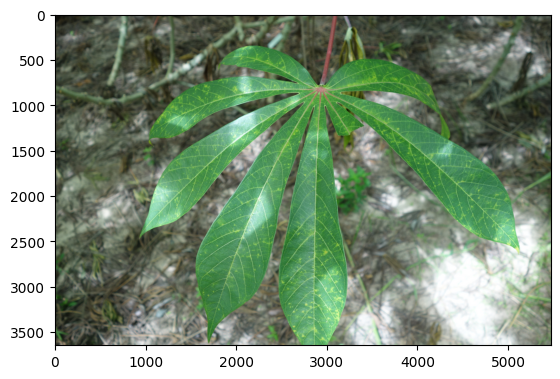

The prediction result from the picture above is Cassava brown leaf spot. The actual name of this disease image is Banana healthy.


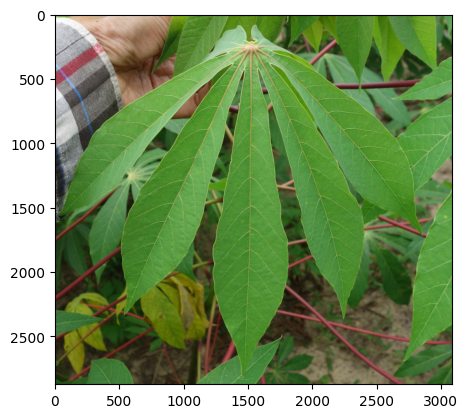

The prediction result from the picture above is Cassava brown leaf spot. The actual name of this disease image is Banana leaf spot.


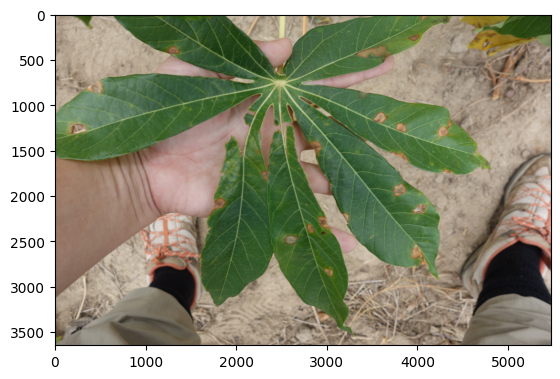

The prediction result from the picture above is Cassava brown leaf spot. The actual name of this disease image is Banana yellow leaf.


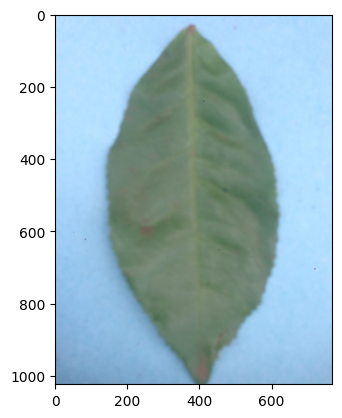

The prediction result from the picture above is Tea gray light. The actual name of this disease image is Cacao black pod rot.


KeyboardInterrupt: ignored

In [ ]:
test_dir = "/content/Dataset/test/"
diseases_name = ['Banana healthy', 'Banana sigatoka', 'Banana pestalotiopsis', 'Banana cordana', 'Cacao black pod rot', 'Cacao healthy', 'Cacao pod borer', 'Cassava brown leaf spot', 'Cassava brown streak disease',
                'Cassava green mottle', 'Cassava healthy', 'Cassava mosaic disease', 'Cassava resistance marker', 'Coffee cercospora', 'Coffee healthy', 'Coffee leaf rust', 'Coffee miner', 'Coffee phoma',
                'Corn cercospora leaf spot', 'Corn common rust', 'Corn gray leaf spot', 'Corn healthy', 'Corn northern leaf blight', 'Guava canker', 'Guava dot', 'Guava healthy', 'Guava mummification',
                'Guava Rust', 'Mango anthracnose', 'Mango bacterial canker', 'Mango cutting weevil', 'Mango die back', 'Mango gall midge', 'Mango healthy', 'Mango powdery mildew', 'Mango sooty mould',
                'Orange haunglongbing', 'Potato early blight', 'Potato healthy', 'Potato hollow heart', 'Potato late blight', 'Rice bacterial leaf blight', 'Rice brown spot', 'Rice healthy', 'Rice hispa',
                'Rice leaf smut', 'Rice leaf blast', 'Rice sogatella', 'Soybean healthy', 'Squash powdery mildew', 'Tea algal leaf', 'Tea anthracnose', 'Tea bird eye spot', 'Tea brown blight', 'Tea gray light',
                'Tea healthy', 'Tea red leaf spot', 'Tea white spot', 'Tomato bacterial spot', 'Tomato early blight', 'Tomato healthy', 'Tomato late blight', 'Tomato leaf mold', 'Tomato septoria leaf spot',
                'Tomato spider mites', 'Tomato target spot', 'Tomato mosaic virus', 'Tomato yellow leaf curl virus']

i = 0
n = 0
for disease in os.listdir(test_dir):
  disease_actual_name = diseases_name[i]
  disease_path = os.path.join(test_dir, disease)
  image_path = os.path.join(disease_path, os.listdir(disease_path)[0])
  pred_disease = disease_prediction(image_path)
  print("The prediction result from the picture above is {}. The actual name of this disease image is {}." .format(pred_disease, disease_actual_name))
  if pred_disease == disease_actual_name:
    n += 1
  i += 1
print("\nFrom 67 images, there are {} that are predicted to be correct".format(n))

### Predict with upload files

Saving 1ac8d300-077c-43dc-8685-83ac695e07b4___GCREC_Bact.Sp 3672.JPG to 1ac8d300-077c-43dc-8685-83ac695e07b4___GCREC_Bact.Sp 3672.JPG


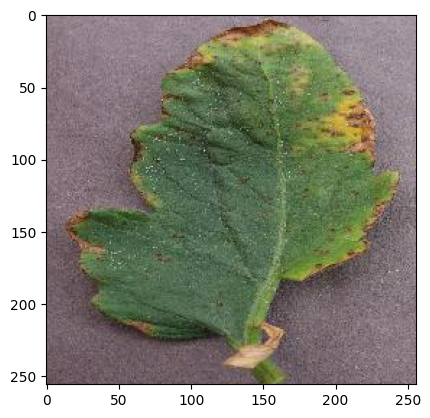

Predicted disease: Tea white spot
Actual disease: Banana leaf spot


In [ ]:
# Get the path to the uploaded image
uploaded_image_path = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded_image_path.keys())[0]

# Make prediction
pred_disease = disease_prediction(image_path)
print('Predicted disease:', pred_disease)
print('Actual disease:', disease_actual_name)
